In [3]:
#https://networkrepository.com/soc-gplus.php
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
G = nx.read_edgelist("soc-gplus.edges")

In [4]:
#the number of nodes and edges in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 23628
Number of edges: 39194


In [4]:
#the average degree of the graph
degrees = [val for (node, val) in G.degree()]
print("Average degree:", np.mean(degrees))

Average degree: 3.3175893008295243


In [7]:
#the density of the graph
print("Density:", nx.density(G))

Density: 0.00014041517335377002


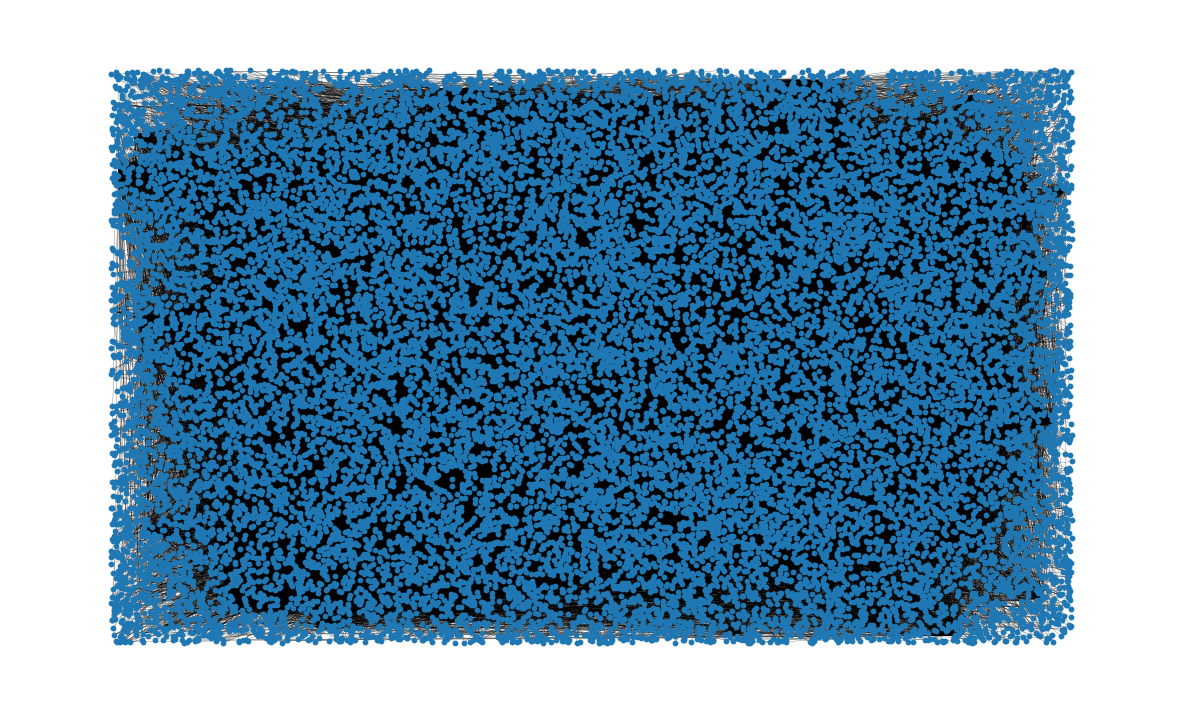

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

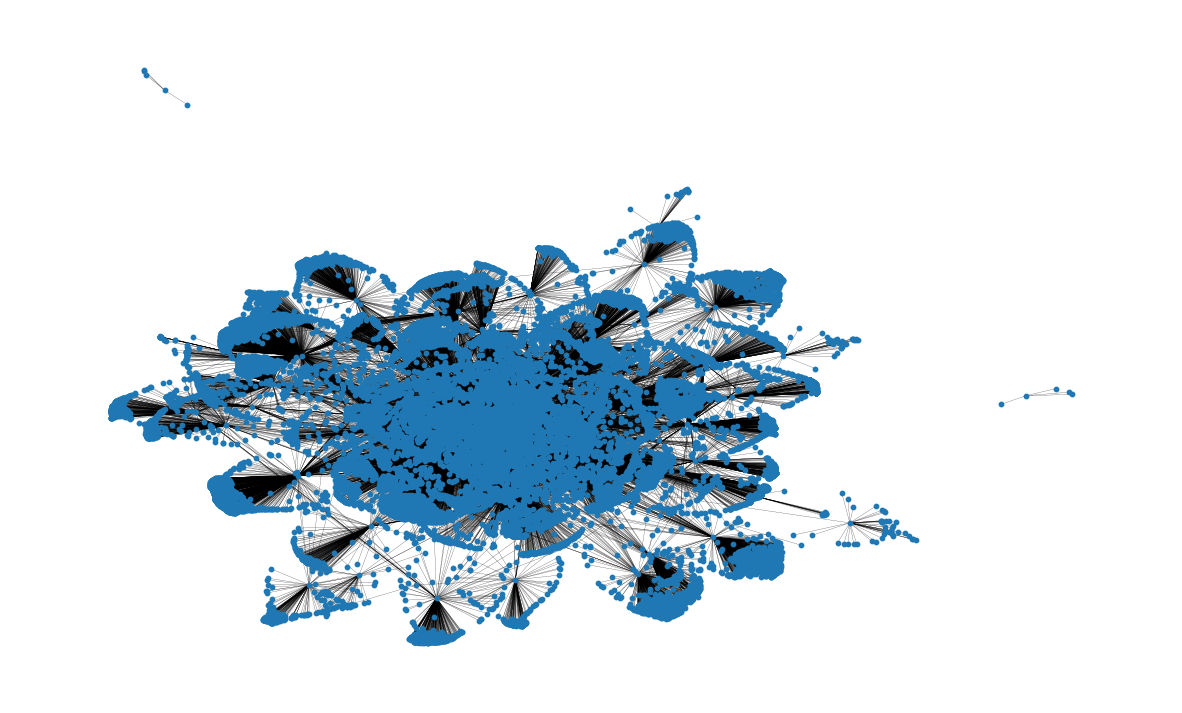

In [10]:
#the graph
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

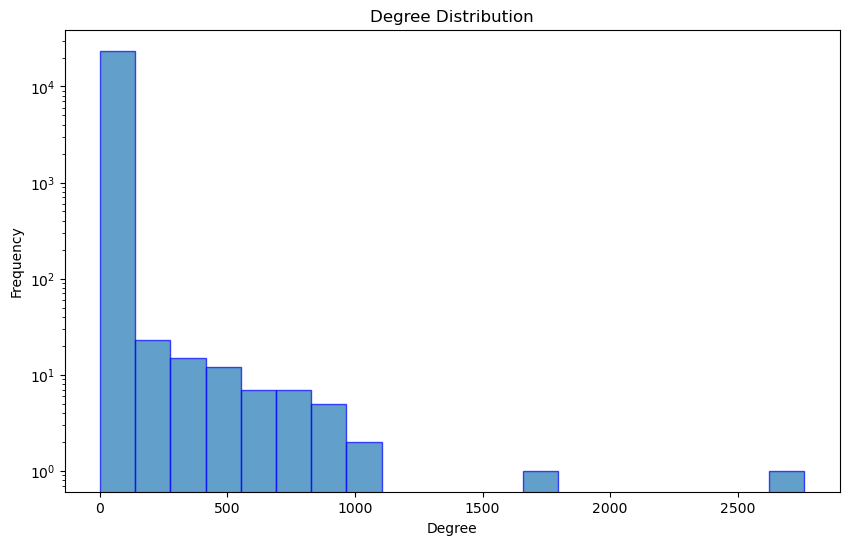

In [8]:
node_degrees = dict(G.degree())

degree_values = list(node_degrees.values())

plt.figure(figsize=(10, 6))
plt.hist(degree_values, bins=20, edgecolor='blue', alpha=0.7)
#plt.hist(degree_values, bins=range(1, max(degree_values) + 1), edgecolor='blue', alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.yscale('log')
plt.show()

In [16]:
#Degree Centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_degree_centrality[:10]

df = pd.DataFrame(sorted_degree_centrality, columns=["Node", "Degree Centrality"])
df.head(10)
    


,Node,Degree Centrality
0,2300,0.116858
1,8306,0.072079
2,2622,0.042282
3,2376,0.041732
4,11324,0.040716
5,19205,0.039658
6,1876,0.039362
7,15599,0.039023
8,8892,0.035426
9,7101,0.033225


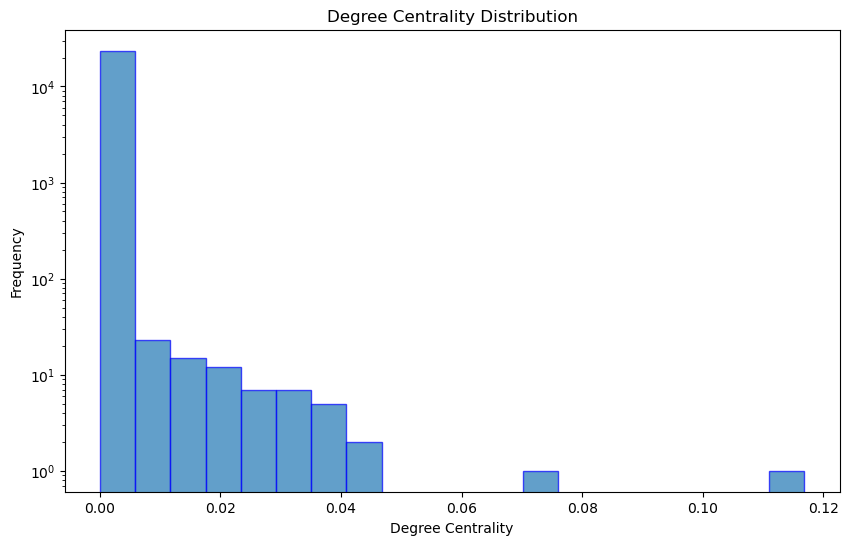

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(list(degree_centrality.values()), bins=20, edgecolor='blue', alpha=0.7)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [20]:
#closeness Centrality 
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_closeness_centrality[:10]

df = pd.DataFrame(sorted_closeness_centrality, columns=["Node", "Closeness Centrality"])
df.head(10)


,Node,Closeness Centrality
0,2300,0.408507
1,1876,0.381952
2,2622,0.371595
3,6306,0.366169
4,629,0.358797
5,3234,0.358443
6,3331,0.357363
7,3414,0.355891
8,1074,0.352689
9,2255,0.352657


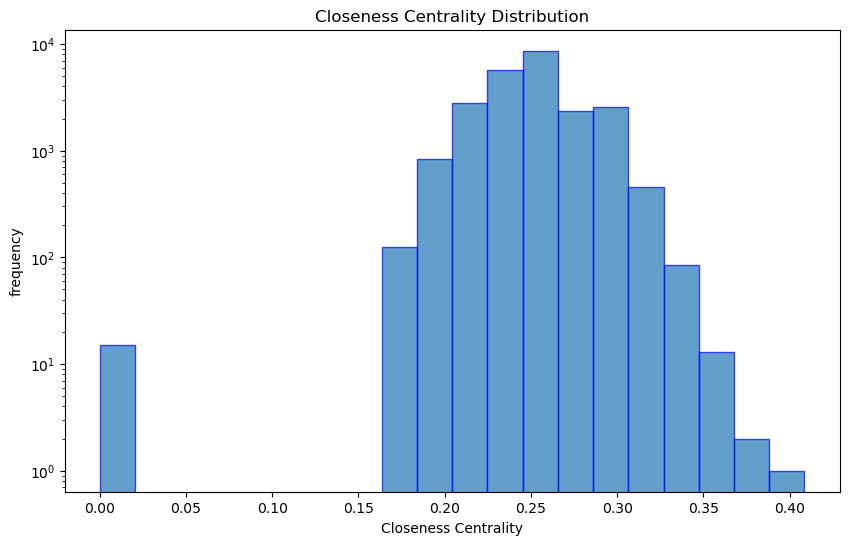

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(list(closeness_centrality.values()), bins=20, edgecolor='blue', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

In [21]:
#betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness_centrality[:10]

df = pd.DataFrame(sorted_betweenness_centrality, columns=["Node", "Betweenness Centrality"])
df.head(10)


,Node,Betweenness Centrality
0,2300,0.221928
1,1876,0.160931
2,8306,0.112780
3,15599,0.067009
4,2622,0.059116
5,18440,0.054284
6,19205,0.054052
7,4965,0.048714
8,7101,0.045732
9,5958,0.042765


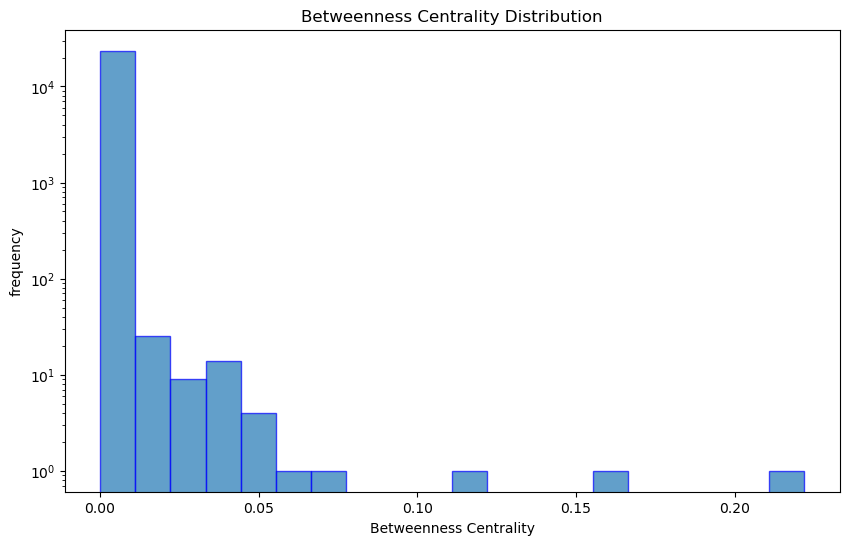

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(list(betweenness_centrality.values()), bins=20, edgecolor='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

In [6]:
#check if the graph is connected
print("Is the graph connected?", nx.is_connected(G))

Is the graph connected? False


In [5]:
#find the giant component
components = nx.connected_components(G)
giant_component = max(components, key=len)
G_giant = G.subgraph(giant_component)
print("Number of nodes in the giant component:", G_giant.number_of_nodes())
print("Number of edges in the giant component:", G_giant.number_of_edges())

Number of nodes in the giant component: 23613
Number of edges in the giant component: 39182


In [5]:
#Degree distribution
degree_distribution = dict(G.degree())
sorted_degree_distribution = sorted(degree_distribution.items(), key=lambda x: x[1], reverse=True)
sorted_degree_distribution[:10]

df = pd.DataFrame(sorted_degree_distribution, columns=["Node", "Degree"])
df.head(10)


,Node,Degree
0,2300,2761
1,8306,1703
2,2622,999
3,2376,986
4,11324,962
5,19205,937
6,1876,930
7,15599,922
8,8892,837
9,7101,785


In [7]:
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree assortativity coefficient:", assortativity)

Degree assortativity coefficient: -0.3885157446925048


In [9]:
#triangles
triangles = nx.triangles(G)
sorted_triangles = sorted(triangles.items(), key=lambda x: x[1], reverse=True)
sorted_triangles[:10]

df = pd.DataFrame(sorted_triangles, columns=["Node", "Triangles"])
df.head(10)

,Node,Triangles
0,2300,4559
1,2622,1657
2,3331,1529
3,9424,1437
4,8892,1404
5,9165,1331
6,9420,1184
7,1814,1125
8,1876,1092
9,3234,1009


In [10]:
#clustering coefficient
nx.average_clustering(G)
print("Average clustering coefficient:", nx.average_clustering(G))

Average clustering coefficient: 0.17412604214483396


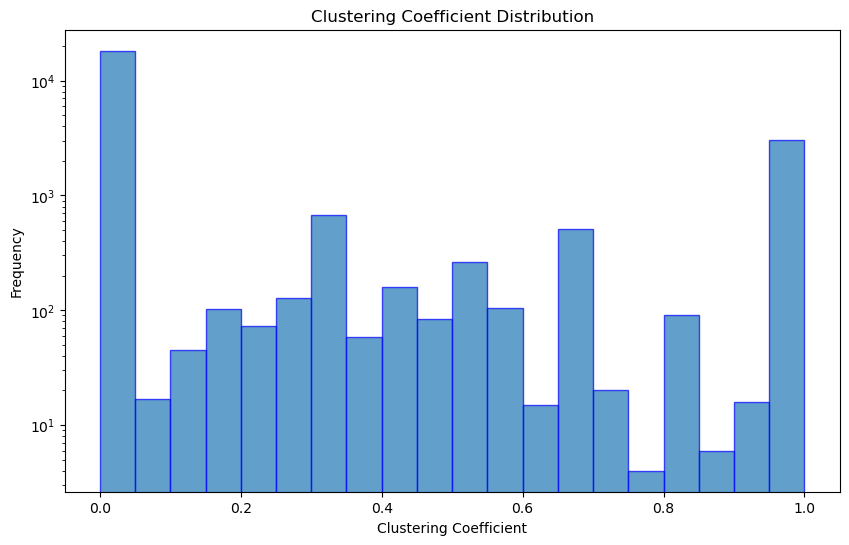

In [11]:
#histogram of clustering coefficients
clustering_coefficients = nx.clustering(G)
plt.figure(figsize=(10, 6))
plt.hist(list(clustering_coefficients.values()), bins=20, edgecolor='blue', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [12]:
#transitivity
transitivity = nx.transitivity(G)
print("Transitivity:", transitivity)

Transitivity: 0.0037087945918890955


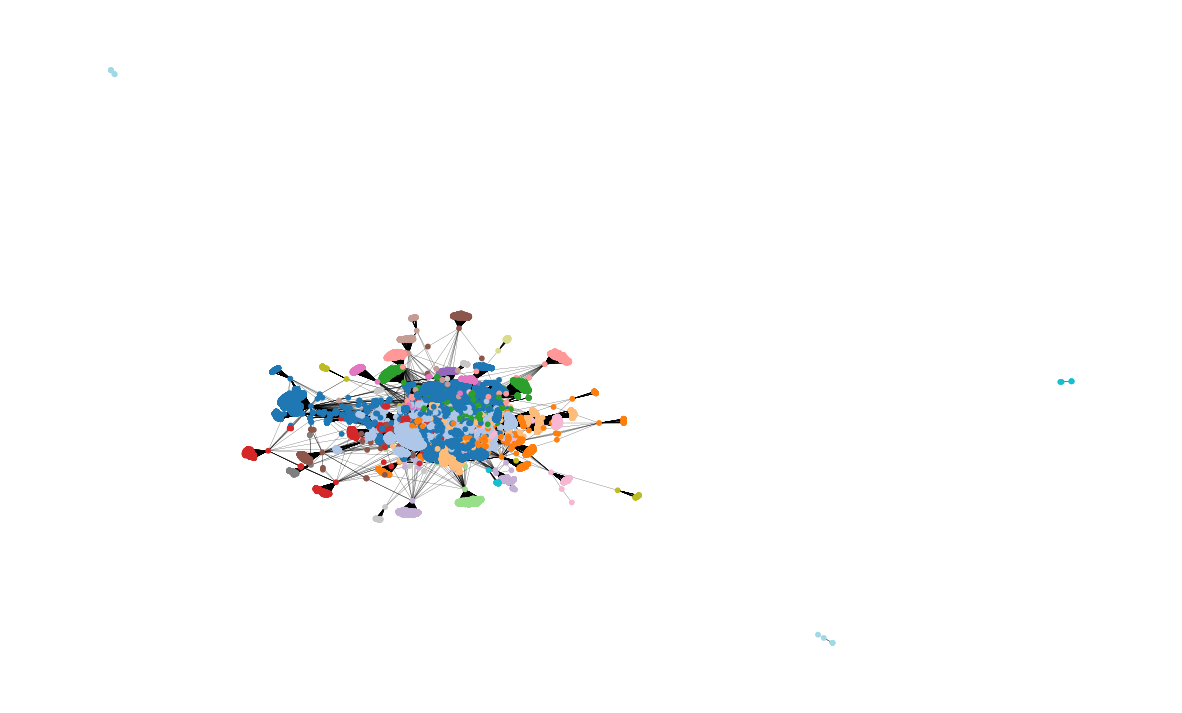

In [17]:
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
communities = list(communities)

node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

colors = [node_community[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15, "node_color": colors, "cmap": plt.cm.tab20}
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=1721), ax=ax, **plot_options)

plt.show()
